# Question: 1 Customer_churn Prediction

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [202]:
# 1. Load Data
df = pd.read_csv("/content/customer_churn.csv")

In [203]:
df.shape

(1000, 12)

In [204]:
df.info

<bound method DataFrame.info of     customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    CUST00000    Male              1     Yes         No       7           No   
1    CUST00001  Female              0      No         No      35           No   
2    CUST00002    Male              0      No         No      55          Yes   
3    CUST00003    Male              0      No         No      14           No   
4    CUST00004    Male              0      No        Yes      10           No   
..         ...     ...            ...     ...        ...     ...          ...   
995  CUST00995    Male              0     Yes         No      71           No   
996  CUST00996    Male              1     Yes         No      26          Yes   
997  CUST00997  Female              0     Yes         No      40           No   
998  CUST00998  Female              0      No         No       5           No   
999  CUST00999    Male              0      No         No      21          Yes   

    InternetService        Contract  MonthlyCharges Churn  TotalCharges  
0               DSL        Two year           51.16   Yes        358.12  
1                No        One year          104.57    No       3659.95  
2                No        Two year           45.96    No       2527.80  
3                No        One year           20.16    No        282.24  
4                No        Two year           57.64    No        576.40  
..              ...             ...             ...   ...           ...  
995              No  Month-to-month           74.57   Yes       5294.47  
996             DSL        Two year           88.40   Yes       2298.40  
997              No        One year           39.02   Yes       1560.80  
998              No        One year           72.09    No        360.45  
999             DSL        One year           66.91    No       1405.11  

[1000 rows x 12 columns]>

In [205]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
InternetService,0
Contract,0
MonthlyCharges,0


In [206]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,0.474000,36.672000,69.87997,2563.543400
std,0.499573,20.322338,28.58873,1881.283287
min,0.000000,1.000000,20.16000,37.460000
25%,0.000000,19.000000,45.50000,1110.625000
50%,0.000000,37.000000,70.22500,2097.370000
75%,1.000000,54.000000,94.63000,3634.295000
max,1.000000,72.000000,119.90000,8504.640000


In [207]:
# Drop customerID (non-informative)
df.drop('customerID', axis=1, inplace=True)

In [208]:
# Handle missing values in TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

In [209]:
# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

In [210]:
# Encode categorical variables
for column in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

In [211]:
# Encode target variable
y = y.map({'No': 0, 'Yes': 1})

In [212]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [213]:
# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [214]:
# 3. Design ANN model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

In [215]:
# 4. Compile and train
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5487 - loss: 0.6958 - val_accuracy: 0.4062 - val_loss: 0.7059
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5052 - loss: 0.6935 - val_accuracy: 0.4000 - val_loss: 0.7038
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5130 - loss: 0.6946 - val_accuracy: 0.3875 - val_loss: 0.7029
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5187 - loss: 0.6899 - val_accuracy: 0.3938 - val_loss: 0.7028
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5266 - loss: 0.6858 - val_accuracy: 0.3938 - val_loss: 0.7026
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5432 - loss: 0.6823 - val_accuracy: 0.3875 - val_loss: 0.7026
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5388 - loss: 0.6856 - val_accuracy: 0.4000 - val_loss: 0.7023
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5621 - loss: 0.6779 - val_accuracy: 0.3875 - val_l

In [216]:
# 5. Evaluate model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [217]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.47
Confusion Matrix:
[[57 43]
 [64 36]]


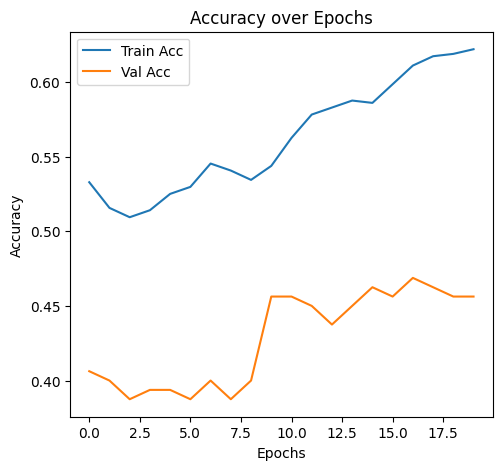

In [218]:
# 6. Visualize accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

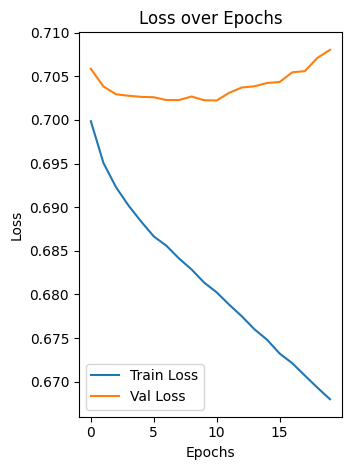

In [219]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Question: 2: Pytorch

In [120]:
import torch

In [118]:
# a. create tensor 3x3

tensor1 = torch.rand(3, 3)
print(tensor1)

tensor([[0.3430, 0.2408, 0.9783],
        [0.1204, 0.5933, 0.7760],
        [0.1849, 0.6599, 0.0607]])


In [119]:
# b. 3x3 tensor initializes with ones
tensor2 = torch.ones(3, 3)
print(tensor2)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [117]:
# c. element wise addition
tensor_sum = tensor1 + tensor2
print(tensor_sum)

tensor([[1.6789, 1.1139, 1.5402],
        [1.4053, 1.5069, 1.1171],
        [1.3110, 1.4969, 1.5509]])


In [115]:
# d. element wise multiplication
tensor_product = tensor1 * tensor2
print(tensor_product)

tensor([[0.6789, 0.1139, 0.5402],
        [0.4053, 0.5069, 0.1171],
        [0.3110, 0.4969, 0.5509]])


In [116]:
# e. matrix multiplication
tensor_matmul = torch.matmul(tensor1, tensor2)
print(tensor_matmul)

tensor([[1.3329, 1.3329, 1.3329],
        [1.0293, 1.0293, 1.0293],
        [1.3587, 1.3587, 1.3587]])


# Question 3: Tensorflow

In [121]:
import tensorflow as tf

In [127]:
# 1. Zero tensor
tf_a = tf.zeros((3, 3))
print(tf_a)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(3, 3), dtype=float32)


In [128]:
# 2. Ones tensor
tf_b = tf.ones((3, 3))
print(tf_b)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)


In [130]:
# 3. Element-wise addition
add = tf_a + tf_b
print(add)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)


In [131]:
# 4. Element-wise multiplication
mul = tf_a * tf_b
print(mul)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(3, 3), dtype=float32)


In [132]:
# 5. Matrix multiplication
matmul = tf.matmul(tf_a, tf_b)
print(matmul)

tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(3, 3), dtype=float32)


# question 4: sentiment analysis

# Importing Libraries

In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv(r'/content/movie_reviews.csv')

In [13]:
df.head(5)

,review,sentiment
0,Fantastic direction and powerful message.,positive
1,Uninspired and forgettable.,negative
2,Terrible plot and dull characters.,negative
3,I really disliked this movie.,negative
4,"Well-made, with a satisfying ending.",positive


In [14]:
df.shape

(1000, 2)

In [15]:
df["sentiment"].value_counts()

,count
sentiment,
positive,524
negative,476


In [16]:
df.isnull().sum()

,0
review,0
sentiment,0


In [17]:
df.duplicated().sum()

np.int64(980)

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(20, 2)

In [20]:
df.duplicated().sum()

np.int64(0)

# Data Preprocessing

In [21]:
  import nltk
  nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from string import punctuation
from nltk.corpus import stopwords
stop = stopwords.words("english")

sw_list = list(punctuation) + stop

In [23]:
def text_cleaner(text):
    filtered_text = []
    from nltk.tokenize import word_tokenize
    tokenize = word_tokenize(text)
    for word in tokenize:
        if word.lower() not in sw_list:
            filtered_text.append(word)
    return " ".join(filtered_text)

In [24]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [25]:
df['review'] = df['review'].apply(text_cleaner)

# Train_Test_Split

In [26]:
# differentiating
X = df.iloc[:,0:1]
y = df['sentiment']

In [27]:
X.shape

(20, 1)

# Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [29]:
# Train_Test_Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

# Applying Bag of Word

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

# Applying tfidf

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train['review']).toarray()
X_test_tfidf = tfidf.transform(X_test['review']).toarray()


In [33]:
X_test_tfidf.shape
X_train_tfidf.shape

(16, 54)

# Using RNN

In [133]:
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1.
model = Sequential()
model.add(SimpleRNN(64, input_shape=(1, X_train_tfidf.shape[1])))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 2. Train the model
history = model.fit(X_train_reshaped, y_train, epochs=5, batch_size=64, validation_split=0.2)

# 3. Evaluate on test data
test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
print("RNN Test Accuracy:", test_acc)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7500 - loss: 0.6681 - val_accuracy: 0.2500 - val_loss: 0.7295
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.7500 - loss: 0.6576 - val_accuracy: 0.2500 - val_loss: 0.7292
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7500 - loss: 0.6472 - val_accuracy: 0.2500 - val_loss: 0.7289
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.8333 - loss: 0.6369 - val_accuracy: 0.2500 - val_loss: 0.7286
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.8333 - loss: 0.6268 - val_accuracy: 0.5000 - val_loss: 0.7283
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2500 - loss: 0.7026
RNN Test Accuracy: 0.25


In [134]:
# 4. Predict on test data
y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")

# 5. Confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step

Confusion Matrix:
 [[1 0]
 [3 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.00      0.00      0.00         3

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4



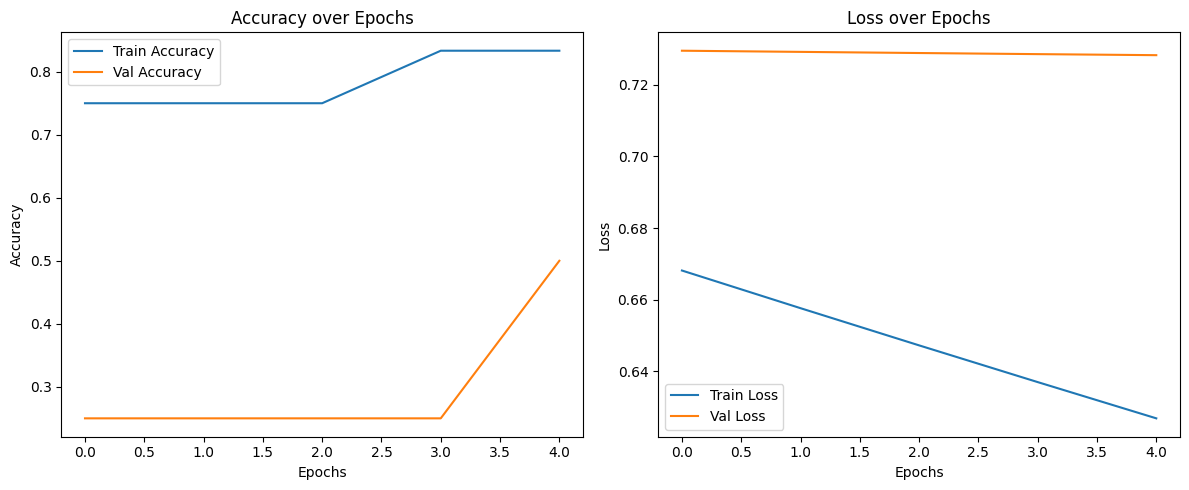

In [135]:
# 6. Visualize training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Using LSTM

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# No .toarray() if already a NumPy array
X_train_reshaped = X_train_tfidf.reshape((X_train_tfidf.shape[0], 1, X_train_tfidf.shape[1]))
X_test_reshaped = X_test_tfidf.reshape((X_test_tfidf.shape[0], 1, X_test_tfidf.shape[1]))

model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train_tfidf.shape[1])))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=0)

test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
print("Test Accuracy:", test_acc)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0000e+00 - loss: 0.7071
Test Accuracy: 0.0


In [ ]:
# Prediction on test data
print((model.predict(X_test_reshaped) > 0.5).astype("int32"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
[[1]
 [1]]


In [37]:
# Prediction using RNN

text = input("Enter a review: ")
cleaned = text_cleaner(text)
vec = tfidf.transform([cleaned]).toarray().reshape(1, 1, -1)
print("Predicted Sentiment:", "Positive" if model.predict(vec)[0][0] > 0.5 else "Negative")

Enter a review: this is a good movie
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Sentiment: Positive


In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 64)             │         7,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,045 (90.02 KB)

 Trainable params: 7,681 (30.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,364 (60.02 KB)